In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from scipy.stats import chi2

from statsmodels.tsa.ar_model import AutoReg

import warnings
warnings.filterwarnings('ignore')

# Uploading the dataset

In [2]:
# Import the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

import warnings
warnings.filterwarnings("ignore")

# Storing the dataframe in a variable called "df"
df = pd.read_csv('US_data.csv')

# Showing the fisrt 5 rows of the dataset
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,8/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,8/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12/6/2016,16/6/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Data Preparation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
# changing the data type
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [5]:
# checking the first and the last day of the column 'Order date'
df['Order Date'].describe()

count                    9994
unique                   1237
top       2016-05-09 00:00:00
freq                       38
first     2014-01-02 00:00:00
last      2017-12-30 00:00:00
Name: Order Date, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [7]:
df.sort_values('Order Date', inplace = True)
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
540,541,CA-2014-140795,2014-01-02,3/2/2014,First Class,BD-11500,Bradley Drucker,Consumer,United States,Green Bay,...,54302,Central,TEC-AC-10001432,Technology,Accessories,Enermax Aurora Lite Keyboard,468.900,6,0.0,206.3160
6547,6548,CA-2014-113880,2014-01-03,5/3/2014,Standard Class,VF-21715,Vicky Freymann,Home Office,United States,Elmhurst,...,60126,Central,FUR-CH-10000863,Furniture,Chairs,Novimex Swivel Fabric Task Chair,634.116,6,0.3,-172.1172
7948,7949,CA-2014-131009,2014-01-03,5/3/2014,Standard Class,SC-20380,Shahid Collister,Consumer,United States,El Paso,...,79907,Central,FUR-CH-10001270,Furniture,Chairs,Harbour Creations Steel Folding Chair,362.250,6,0.3,0.0000
7949,7950,CA-2014-131009,2014-01-03,5/3/2014,Standard Class,SC-20380,Shahid Collister,Consumer,United States,El Paso,...,79907,Central,FUR-FU-10001095,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,63.552,6,0.6,-34.9536
5713,5714,US-2014-143707,2014-01-03,5/3/2014,Standard Class,HR-14770,Hallie Redmond,Home Office,United States,New York City,...,10035,East,TEC-PH-10003655,Technology,Phones,Sannysis Cute Owl Design Soft Skin Case Cover ...,5.940,3,0.0,1.6038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,908,CA-2017-143259,2017-12-30,3/1/2018,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
5091,5092,CA-2017-156720,2017-12-30,3/1/2018,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,...,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048
1297,1298,CA-2017-115427,2017-12-30,3/1/2018,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750
906,907,CA-2017-143259,2017-12-30,3/1/2018,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,4,0.2,12.1176


Next we are going to create a new dataframe with variables we will use for the purpose of the project, such as 'Profit' and 'Number of orders'. To get the number of orders we will take into account every time an order was placed and then sum them up to get a total number. We will create a column 'Order' with value 1 following each placed order and then groupby to see how many orders had been placed daily. 

In [8]:
df['Order'] = 1
df_new = df[['Order Date','Order','Profit']]
df_new

,Order Date,Order,Profit
540,2014-01-02,1,206.3160
6547,2014-01-03,1,-172.1172
7948,2014-01-03,1,0.0000
7949,2014-01-03,1,-34.9536
5713,2014-01-03,1,1.6038
...,...,...,...
907,2017-12-30,1,2.7279
5091,2017-12-30,1,-0.6048
1297,2017-12-30,1,6.4750
906,2017-12-30,1,12.1176


In [9]:
# Change name of Order date Column for Date
df_new = df_new.rename(columns={"Order Date":"Date"})
df_new.head()

,Date,Order,Profit
540,2014-01-02,1,206.3160
6547,2014-01-03,1,-172.1172
7948,2014-01-03,1,0.0000
7949,2014-01-03,1,-34.9536
5713,2014-01-03,1,1.6038


In [10]:
df_new = df_new.groupby('Date').sum()
df_new

,Order,Profit
Date,,
2014-01-02,1,206.3160
2014-01-03,10,-208.9614
2014-01-04,4,26.0896
2014-01-06,11,1576.7509
2014-01-07,3,75.3332
...,...,...
2017-12-26,4,61.1202
2017-12-27,2,-31.9742
2017-12-28,19,253.1188


Next we need to check if we have any missing days and their nature. E.g. it can be the fact that no orders had been placed some days or they hadn't been considered due to shop closure.

In [11]:
#creatig a dat_range to get all dates
ix = pd.date_range(start='1/2/2014', end='12/30/2017', freq='D')
ix

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-04', '2014-01-05',
               '2014-01-06', '2014-01-07', '2014-01-08', '2014-01-09',
               '2014-01-10', '2014-01-11',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', length=1459, freq='D')

In [12]:
# concatenating the dataset with a created date range to see and analyze  missing days
df_new=df_new.reindex(ix)
df_new.head(40)

,Order,Profit
2014-01-02,1.0,206.3160
2014-01-03,10.0,-208.9614
2014-01-04,4.0,26.0896
2014-01-05,NaN,NaN
2014-01-06,11.0,1576.7509
2014-01-07,3.0,75.3332
2014-01-08,6.0,66.4750
2014-01-09,5.0,85.9402
2014-01-10,1.0,0.0000
2014-01-11,20.0,663.3641


From the table above we see that the missing days are completely random, they are not weekends or holidays. Therefore we assume that the shop didn't have any orders placed these days and will fill NA with 0.

In [13]:
df_new = df_new.fillna(value=0)
df_new

,Order,Profit
2014-01-02,1.0,206.3160
2014-01-03,10.0,-208.9614
2014-01-04,4.0,26.0896
2014-01-05,0.0,0.0000
2014-01-06,11.0,1576.7509
...,...,...
2017-12-26,4.0,61.1202
2017-12-27,2.0,-31.9742
2017-12-28,19.0,253.1188
2017-12-29,12.0,644.4338


We will be working with monthly data therefore we need to groupby monthly.

In [14]:
df_new.reset_index(inplace=True)
df_new = df_new.rename(columns = {'index':'Date'})
df_new = df_new.resample('M', on='Date').sum()

In the next cell is the final dataset represented.

In [15]:
df_new

,Order,Profit
Date,,
2014-01-31,131.0,4549.4546
2014-02-28,86.0,2654.5569
2014-03-31,168.0,92.6990
2014-04-30,121.0,4601.0714
2014-05-31,148.0,3912.2499
2014-06-30,137.0,4499.7446
2014-07-31,156.0,-1783.5425
2014-08-31,150.0,2081.2676
2014-09-30,239.0,10232.2626


In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2014-01-31 to 2017-12-31
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Order   48 non-null     float64
 1   Profit  48 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


## Seasonal ARIMA model for number of orders prediction

In [17]:
series = df_new.copy()
series = series.drop(columns = 'Profit')
series

,Order
Date,
2014-01-31,131.0
2014-02-28,86.0
2014-03-31,168.0
2014-04-30,121.0
2014-05-31,148.0
2014-06-30,137.0
2014-07-31,156.0
2014-08-31,150.0
2014-09-30,239.0


Text(0.5, 1.0, 'Monthly Order plot')

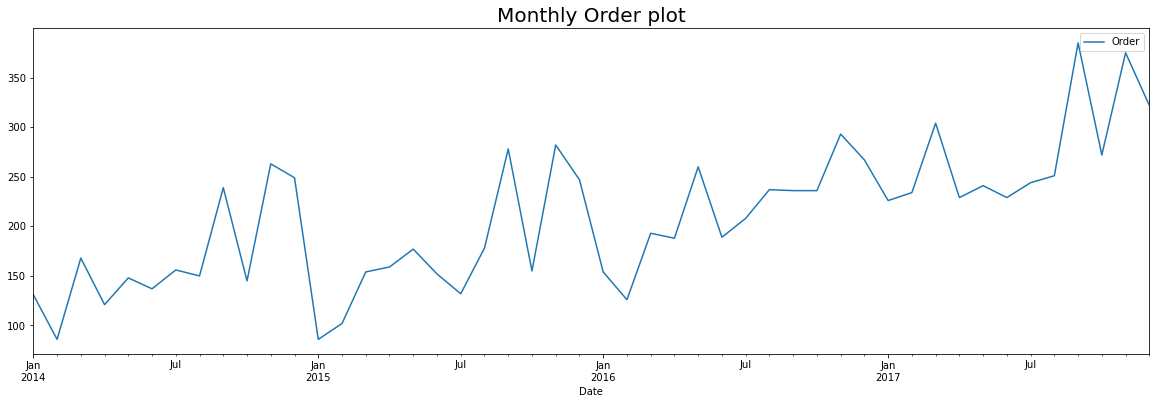

In [18]:
# plotting the graph
series.plot(figsize=(20,6))
plt.title('Monthly Order plot', size = 20)

#### Stationarity check

In [19]:
sts.adfuller(series['Order'])

(-3.561290568849348,
 0.006545680153659592,
 0,
 47,
 {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 409.64538586911914)

As the p-value close to zero, but CV=-3.56 which is lower than 1% level of significance we will assume that the data we are dealing with is non-stationary.

#### Trend and seasonality check

<Figure size 720x432 with 0 Axes>

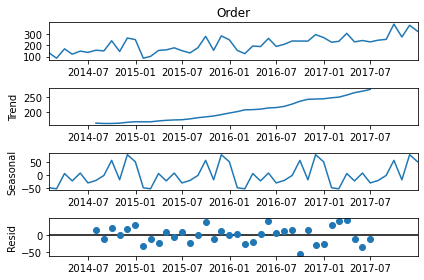

In [20]:
s_dec_additive = seasonal_decompose(x=series['Order'], model='additive')
plt.figure(figsize=(10,6))
s_dec_additive.plot()
plt.show()

Text(0.5, 1.0, 'Seasonality')

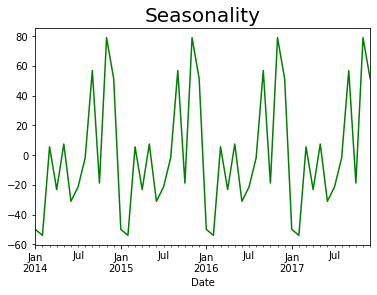

In [21]:
seasonality=s_dec_additive.seasonal
seasonality.plot(color='green')
plt.title('Seasonality', size = 20)

On the graph we see a growing trend and yearly repeating seasonal pattern. It means, in order to make prediction we need to remove the pattern first.

#### ACF and PACF

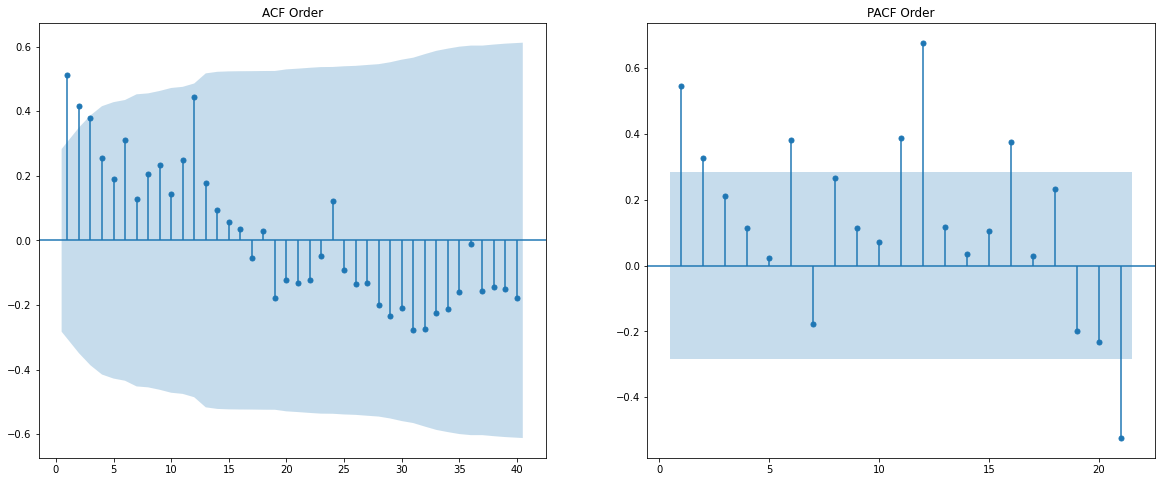

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sgt.plot_acf(series.Order, lags = 40, zero=False, ax=ax1, title = 'ACF Order')
sgt.plot_pacf(series.Order, lags = 21, zero=False, method='ols', ax=ax2, title = 'PACF Order')

plt.show()

#### Removing trend and seasonality - Differencing method

In [23]:
series['returns'] = series['Order'].diff(12)
series=series.iloc[12:]
print(series.shape)
series

(36, 2)


,Order,returns
Date,,
2015-01-31,86.0,-45.0
2015-02-28,102.0,16.0
2015-03-31,154.0,-14.0
2015-04-30,159.0,38.0
2015-05-31,177.0,29.0
2015-06-30,152.0,15.0
2015-07-31,132.0,-24.0
2015-08-31,178.0,28.0
2015-09-30,278.0,39.0


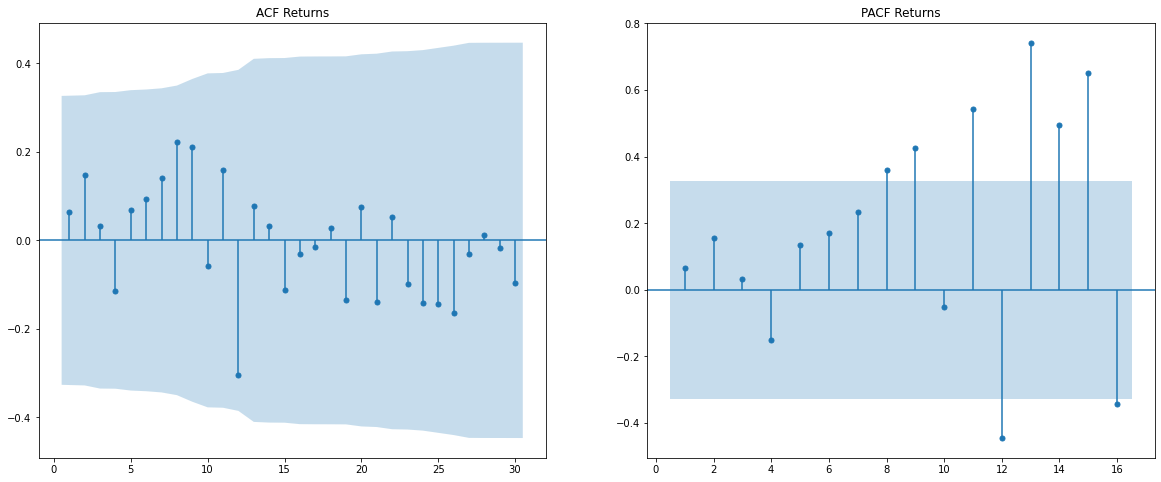

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sgt.plot_acf(series.returns, lags = 30, zero=False, ax=ax1, title = 'ACF Returns')
sgt.plot_pacf(series.returns, lags = 16, zero=False, method='ols', ax=ax2, title = 'PACF Returns')

plt.show()

In [25]:
sts.adfuller(series.returns) # checking if data stationary now

(-5.689188982580548,
 8.145460939735638e-07,
 0,
 35,
 {'1%': -3.6327426647230316,
  '5%': -2.9485102040816327,
  '10%': -2.6130173469387756},
 261.04460327063566)

<AxesSubplot:xlabel='Date'>

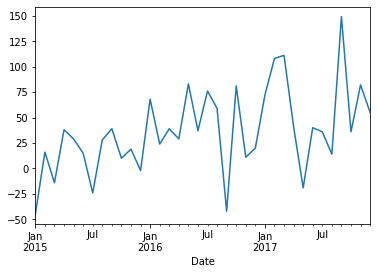

In [26]:
series.returns.plot()

#### SARIMAX

In [27]:
model=sm.tsa.statespace.SARIMAX(series['Order'],order=(8, 1, 0),seasonal_order=(2,1,0,12))
results=model.fit()

<AxesSubplot:xlabel='Date'>

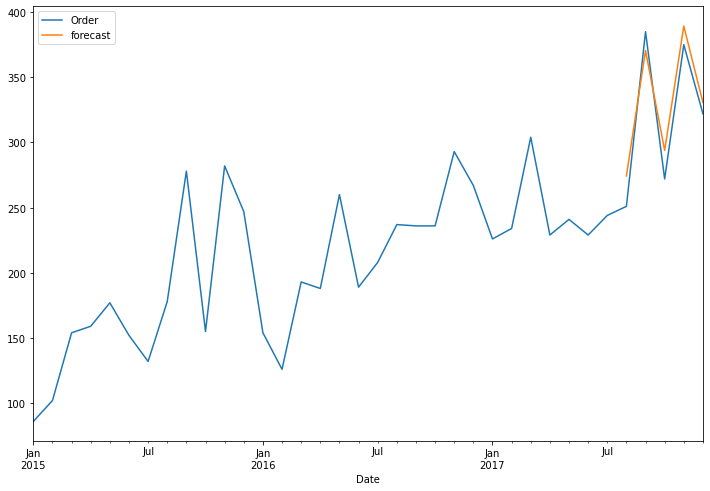

In [28]:
series['forecast']=results.predict(start=31,end=36,dynamic=True)
series[['Order','forecast']].plot(figsize=(12,8))

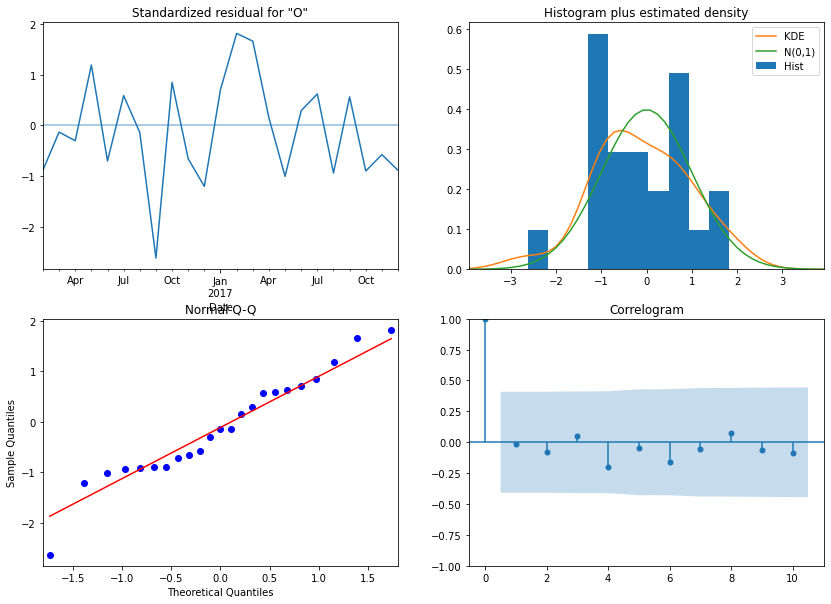

In [29]:
results.plot_diagnostics(figsize=(14,10));

In [30]:
forecast_values = results.get_forecast(steps=50)
forecast_ci = forecast_values.conf_int()

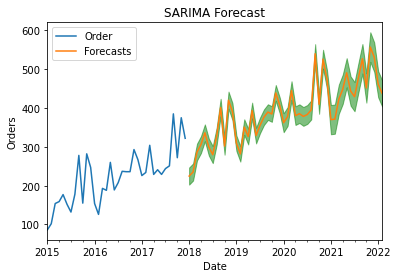

In [31]:
ax = series.Order.plot()
forecast_values.predicted_mean.plot(ax=ax, label = 'Forecasts')
ax.fill_between(forecast_ci.index,
               forecast_ci.iloc[:,0],
               forecast_ci.iloc[:,1], color='g', alpha = .5)

ax.set_xlabel('Date')
ax.set_ylabel('Orders')
ax.set_title('SARIMA Forecast')

plt.legend()

####  Validating the Forecast

In [32]:
# Divide into train and validation set to calculate R-squared score and mean absolute percentage error 
train = series.Order[:30]
test  = series.Order[30:]

train.shape, test.shape

((30,), (6,))

In [33]:
start = len(train)
end   = len(train) + len(test) - 1
predictions = results.predict(start = start, end = end, dynamic = False, typ = 'levels').rename('SARIMA Predictions')
print(predictions)

Date
2017-07-31    228.377324
2017-08-31    274.319261
2017-09-30    372.149142
2017-10-31    292.541386
2017-11-30    387.836775
2017-12-31    340.931908
Freq: M, Name: SARIMA Predictions, dtype: float64


In [34]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error

In [35]:
# Create a dataframe to store r2 score
evaluation = pd.DataFrame({'r2_score': r2_score(test, predictions)}, index = [0])

# Add columns in the dataframe 'evaluation'
evaluation['mean_absolute_error'] = mean_absolute_error(test, predictions)
evaluation['mean_squared_error'] = mean_squared_error(test, predictions)
evaluation['root_mean_squared_error'] = np.sqrt(mean_squared_error(test, predictions))
evaluation['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test)
                                                               /np.abs(test))*100 
# Display the results
evaluation

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
0,0.90142,17.350477,316.358162,17.78646,5.98096
